In [1]:
path1 = r"C:\Users\khush\Downloads\tips.csv"
print(path1)

C:\Users\khush\Downloads\tips.csv


In [2]:
import pandas as pd
df = pd.read_csv(path1)
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [3]:
df.shape

(244, 11)

In [4]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [6]:
df.isnull().sum()

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name          0
CC Number           0
Payment ID          0
dtype: int64

In [7]:
df["day"].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
df["day"].nunique()

4

In [9]:
df.describe()

,total_bill,tip,size,price_per_person,CC Number
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,19.785943,2.998279,2.569672,7.888197,2.563496e+15
std,8.902412,1.383638,0.951100,2.914234,2.369340e+15
min,3.070000,1.000000,1.000000,2.880000,6.040679e+10
25%,13.347500,2.000000,2.000000,5.800000,3.040731e+13
50%,17.795000,2.900000,2.000000,7.255000,3.525318e+15
75%,24.127500,3.562500,3.000000,9.390000,4.553675e+15
max,50.810000,10.000000,6.000000,20.270000,6.596454e+15


In [10]:
a = df.groupby(by = "day") \
    .agg({"total_bill":"sum"}) \
    .sort_values(by = "total_bill", ascending = False)

In [11]:
a

,total_bill
day,
Sat,1778.40
Sun,1627.16
Thur,1096.33
Fri,325.88


<Axes: xlabel='day'>

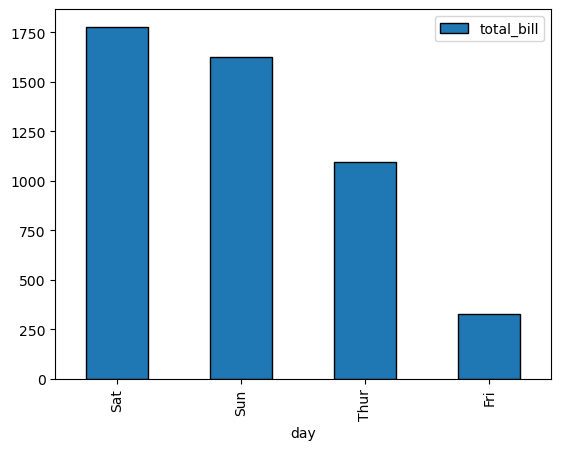

In [12]:
a.plot(kind = "bar", edgecolor = "black")

In [13]:
b = df.groupby(by = ["day", "time"]) \
    .agg({"total_bill":"sum"}) \
    .sort_values(by = "total_bill", ascending = False)

In [14]:
b

total_bill
day  time              
Sat  Dinner     1778.40
Sun  Dinner     1627.16
Thur Lunch      1077.55
Fri  Dinner      235.96
     Lunch        89.92
Thur Dinner       18.78

<Axes: xlabel='day,time'>

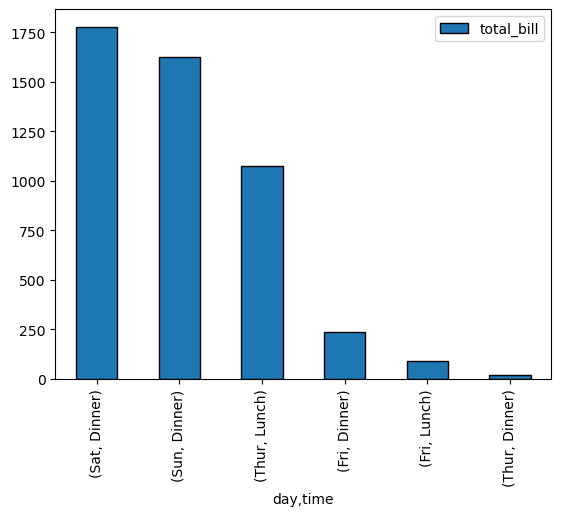

In [15]:
b.plot(kind = "bar", edgecolor = "black")

In [16]:
df.query("day == 'Sun'") \
    .sort_values(by = "total_bill", ascending = False) \
    .head(1)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
156,48.17,5.0,Male,No,Sun,Dinner,6,8.03,Ryan Gonzales,3523151482063321,Sun7518


In [17]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [18]:
path2 = r"C:\Users\khush\Downloads\emp_dept.xlsx"
print(path2)

C:\Users\khush\Downloads\emp_dept.xlsx


In [19]:
emp = pd.read_excel(path2, sheet_name = "emp")

In [20]:
emp

,empid,fn,ln,sal,did
0,101,Naman,Singh,5000,20
1,102,Raman,Tripathi,7000,20
2,103,Chaman,Nagor,8000,20
3,104,Nisha,Patil,9000,30
4,105,Madhu,Reddy,10000,30
5,106,Rahul,Barkade,122746,113


In [21]:
dept = pd.read_excel(path2, sheet_name = "dept")

In [22]:
dept

,dept_id,dname
0,10,HR
1,20,MKT
2,30,SAL
3,40,ADM
4,50,FIN
5,60,ACC


In [23]:
inner = pd.merge(
    left = emp,
    right = dept,
    how = "inner",
    left_on = "did",
    right_on = "dept_id"
)

In [24]:
inner

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20,MKT
1,102,Raman,Tripathi,7000,20,20,MKT
2,103,Chaman,Nagor,8000,20,20,MKT
3,104,Nisha,Patil,9000,30,30,SAL
4,105,Madhu,Reddy,10000,30,30,SAL


In [25]:
inner[["empid", "fn", "ln", "did", "dept_id"]]

,empid,fn,ln,did,dept_id
0,101,Naman,Singh,20,20
1,102,Raman,Tripathi,20,20
2,103,Chaman,Nagor,20,20
3,104,Nisha,Patil,30,30
4,105,Madhu,Reddy,30,30


In [26]:
left = pd.merge(
    left = emp,
    right = dept,
    how = "left",
    left_on = "did",
    right_on = "dept_id"
)

In [27]:
left

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20.0,MKT
1,102,Raman,Tripathi,7000,20,20.0,MKT
2,103,Chaman,Nagor,8000,20,20.0,MKT
3,104,Nisha,Patil,9000,30,30.0,SAL
4,105,Madhu,Reddy,10000,30,30.0,SAL
5,106,Rahul,Barkade,122746,113,NaN,NaN


In [28]:
left[["empid", "fn", "ln", "did", "dept_id"]]

,empid,fn,ln,did,dept_id
0,101,Naman,Singh,20,20.0
1,102,Raman,Tripathi,20,20.0
2,103,Chaman,Nagor,20,20.0
3,104,Nisha,Patil,30,30.0
4,105,Madhu,Reddy,30,30.0
5,106,Rahul,Barkade,113,NaN


In [29]:
right = pd.merge(
    left = emp,
    right = dept,
    how = "right",
    left_on = "did",
    right_on = "dept_id"
)

In [30]:
right

,empid,fn,ln,sal,did,dept_id,dname
0,NaN,NaN,NaN,NaN,NaN,10,HR
1,101.0,Naman,Singh,5000.0,20.0,20,MKT
2,102.0,Raman,Tripathi,7000.0,20.0,20,MKT
3,103.0,Chaman,Nagor,8000.0,20.0,20,MKT
4,104.0,Nisha,Patil,9000.0,30.0,30,SAL
5,105.0,Madhu,Reddy,10000.0,30.0,30,SAL
6,NaN,NaN,NaN,NaN,NaN,40,ADM
7,NaN,NaN,NaN,NaN,NaN,50,FIN
8,NaN,NaN,NaN,NaN,NaN,60,ACC


In [31]:
right[["empid", "fn", "ln", "did", "dept_id"]]

,empid,fn,ln,did,dept_id
0,NaN,NaN,NaN,NaN,10
1,101.0,Naman,Singh,20.0,20
2,102.0,Raman,Tripathi,20.0,20
3,103.0,Chaman,Nagor,20.0,20
4,104.0,Nisha,Patil,30.0,30
5,105.0,Madhu,Reddy,30.0,30
6,NaN,NaN,NaN,NaN,40
7,NaN,NaN,NaN,NaN,50
8,NaN,NaN,NaN,NaN,60


In [32]:
outer = pd.merge(
    left = emp,
    right = dept,
    how = "inner",
    left_on = "did",
    right_on = "dept_id"
)

In [33]:
outer

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20,MKT
1,102,Raman,Tripathi,7000,20,20,MKT
2,103,Chaman,Nagor,8000,20,20,MKT
3,104,Nisha,Patil,9000,30,30,SAL
4,105,Madhu,Reddy,10000,30,30,SAL


In [34]:
outer[["empid", "fn", "ln", "did", "dept_id"]]

,empid,fn,ln,did,dept_id
0,101,Naman,Singh,20,20
1,102,Raman,Tripathi,20,20
2,103,Chaman,Nagor,20,20
3,104,Nisha,Patil,30,30
4,105,Madhu,Reddy,30,30
